In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')

In [2]:
data_dir = './original-Dataset'
train_path = './original-Dataset/Train'
test_path = './original-Dataset/'

# Resizing the images to 30x30x3
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

In [3]:
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [4]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

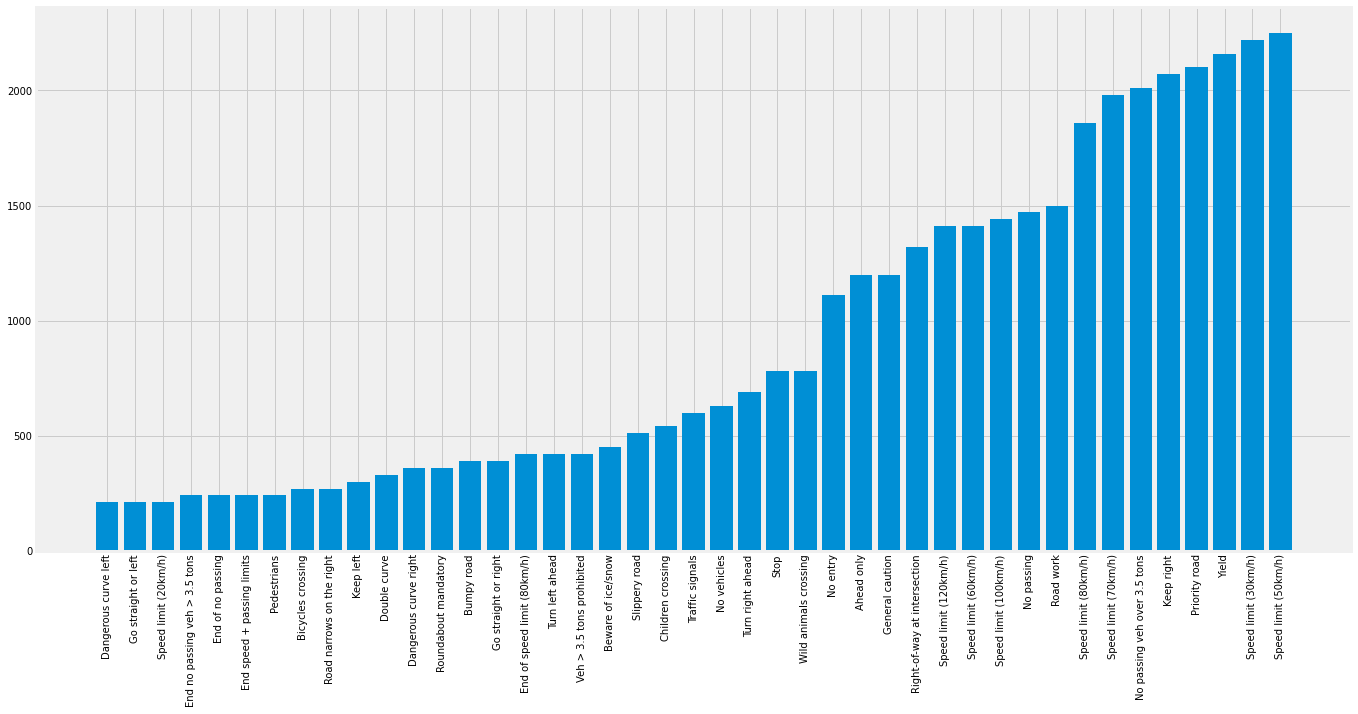

In [5]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

C:\Users\elema\AppData\Local\Temp/ipykernel_21560/1256017970.py:15: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


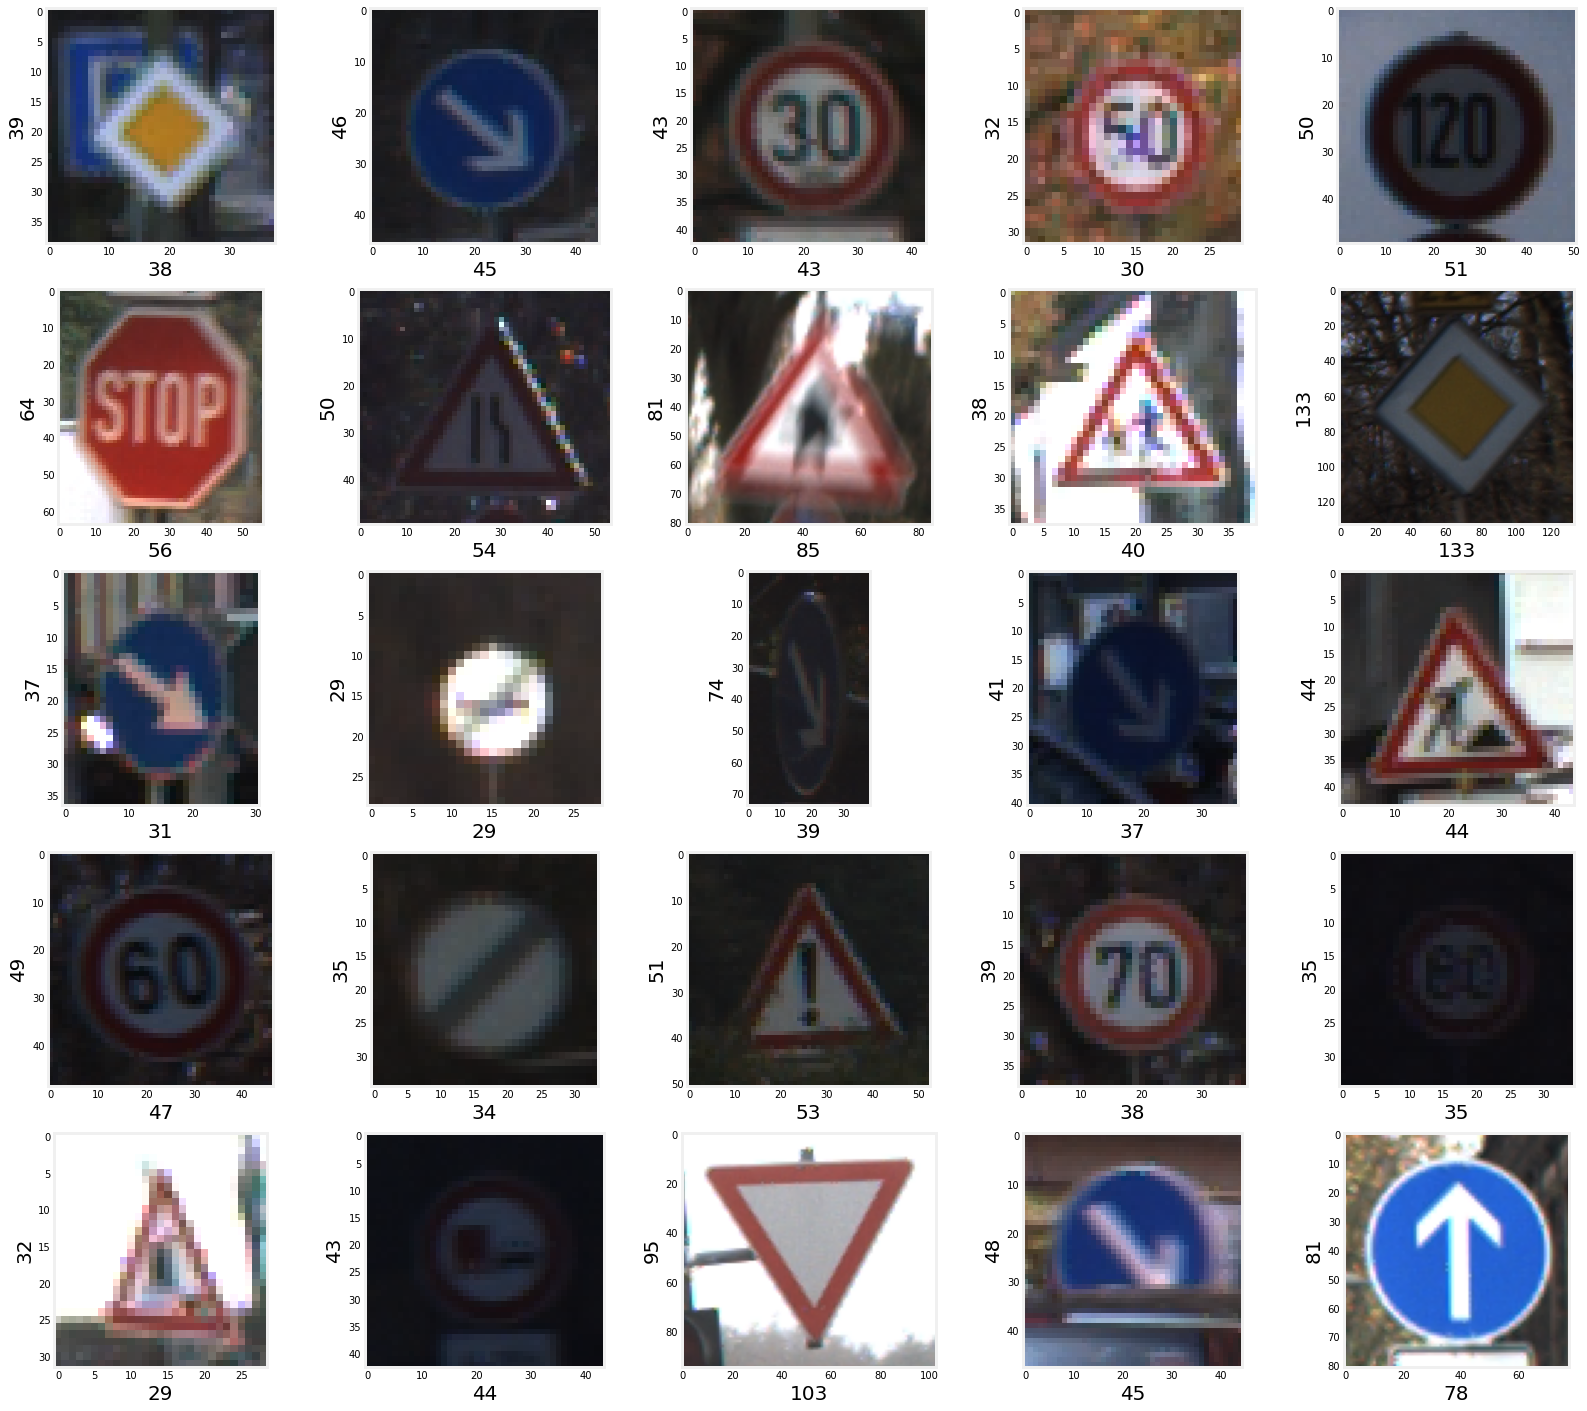

In [6]:
# Visualizing 25 random images from test data
import random
from matplotlib.image import imread

test = pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = data_dir + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

Collecting the Training Data

In [7]:
X_train = []
y_train = []

for i in range(NUM_CATEGORIES):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)
    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            X_train.append(np.array(resize_image))
            y_train.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)

print(X_train.shape, y_train.shape)

(39209, 30, 30, 3) (39209,)


In [8]:
shuffle_indexes = np.arange(X_train.shape[0])
np.random.shuffle(shuffle_indexes)
X_train = X_train[shuffle_indexes]
y_train = y_train[shuffle_indexes]


In [9]:
print(X_train.shape, y_train.shape)

(39209, 30, 30, 3) (39209,)


Loading the test data

In [10]:
test = pd.read_csv(data_dir + '/Test.csv')

y_test = test["ClassId"].values
imgs = test["Path"].values


In [11]:
data = []

for img in imgs:
    try:
        image = cv2.imread(test_path +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)

In [12]:
print(X_test.shape, y_test.shape)

(12630, 30, 30, 3) (12630,)


In [13]:
px=1
for i in X_test[0].shape:
    px*=i
px

2700

In [14]:
import sys  
sys.path.insert(0, '../')
from utils import split_and_save_range

In [15]:
split_and_save_range(train_X_original = X_train, test_X_original = X_test , train_y_original = y_train, test_y_original = y_test, split_range = range(10,51))

shuffle :10
(31103, 2700) (10368, 2700) (10368, 2700) (31103,) (10368,) (10368,)
shuffle :11
(31103, 2700) (10368, 2700) (10368, 2700) (31103,) (10368,) (10368,)
shuffle :12
(31103, 2700) (10368, 2700) (10368, 2700) (31103,) (10368,) (10368,)
shuffle :13
(31103, 2700) (10368, 2700) (10368, 2700) (31103,) (10368,) (10368,)
shuffle :14
(31103, 2700) (10368, 2700) (10368, 2700) (31103,) (10368,) (10368,)
shuffle :15
(31103, 2700) (10368, 2700) (10368, 2700) (31103,) (10368,) (10368,)
shuffle :16
(31103, 2700) (10368, 2700) (10368, 2700) (31103,) (10368,) (10368,)
shuffle :17
(31103, 2700) (10368, 2700) (10368, 2700) (31103,) (10368,) (10368,)
shuffle :18
(31103, 2700) (10368, 2700) (10368, 2700) (31103,) (10368,) (10368,)
shuffle :19
(31103, 2700) (10368, 2700) (10368, 2700) (31103,) (10368,) (10368,)
shuffle :20
(31103, 2700) (10368, 2700) (10368, 2700) (31103,) (10368,) (10368,)
shuffle :21
(31103, 2700) (10368, 2700) (10368, 2700) (31103,) (10368,) (10368,)
shuffle :22
(31103, 2700) (1